<a href="https://colab.research.google.com/github/Manishpirabu/INSE_6220_project/blob/main/Principal_Component_Analysis_and_Brain_tumor_Diagnosis_Using_Machine_Learningr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Principal Component Analysis of brain tumor Dataset**

In [1]:
!pip install pycaret==3.0.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.6/172.6 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.7/20.7 MB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 71.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 65.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 81.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 13.0 MB/s 

In [2]:
from pycaret.utils import version
version()

'3.0.0'

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.5.3
Seaborn version:  0.12.2


Getting CSV file

In [13]:
import pandas as pd

# Assuming you are reading a CSV file
df = pd.read_csv('https://github.com/Manishpirabu/INSE_6220_project/blob/main/Tumor_dataset.csv')

# Display the first 25 rows
df.head(25)


ParserError: ignored

In [18]:
import pandas as pd

# Assuming you are reading the 'Sheet1' of the Excel file
df = pd.read_csv('https://github.com/Manishpirabu/INSE_6220_project/raw/main/Tumor_dataset.csv')


# Display the first 25 rows
df.head(25)


Class       Mean     Variance  Standard Deviation   Entropy       ASM  \
0       0   6.535339   619.587845           24.891522  0.109059  0.086033   
1       0   8.749969   805.957634           28.389393  0.266538  0.225674   
2       1   7.341095  1143.808219           33.820234  0.001467  0.001019   
3       1   5.958145   959.711985           30.979219  0.001477  0.001026   
4       0   7.315231   729.540579           27.010009  0.146761  0.118232   
5       0   7.524109   607.395258           24.645390  0.214086  0.177736   
6       0  12.304413   922.746138           30.376737  0.128833  0.102832   
7       0  15.929474  1069.950248           32.710094  0.107658  0.084868   
8       0  19.921616  1166.120922           34.148513  0.094975  0.074248   
9       1   8.476196  1095.785127           33.102645  0.003002  0.002087   
10      1   9.804611  1114.829653           33.389065  0.002436  0.001692   
11      1  12.326782  1150.677144           33.921632  0.003769  0.002634   
12      1  10.193466   813.924363           28.529360  0.009774  0.006936   
13      0   7.156311   413.438221           20.333180  0.081825  0.062955   
14      0   5.291473   430.963766           20.759667  0.354116  0.308402   
15      1  12.773941   988.403172           31.438880  0.002234  0.001552   
16      1  15.317520  1076.878002           32.815819  0.004808  0.003372   
17      0   6.246719   459.398171           21.433576  0.121085  0.096014   
18      0   5.450424   337.879291           18.381493  0.112746  0.088699   
19      0   8.333740   475.782357           21.812436  0.204902  0.169272   
20      0   6.339523   293.878381           17.142881  0.069965  0.053554   
21      0   1.480270    62.091259            7.879801  0.132055  0.105490   
22      0   4.506058   280.829159           16.757958  0.133243  0.106421   
23      0   6.592896   392.211339           19.804326  0.204876  0.169241   
24      0  10.964294   619.832925           24.896444  0.126598  0.100810   

    Homogeneity  Dissimilarity  Correlation  
0      0.530941       4.473346     0.981939  
1      0.651352       3.220072     0.988834  
2      0.268275       5.981800     0.978014  
3      0.243851       7.700919     0.964189  
4      0.501140       6.834689     0.972789  
5      0.598169       4.193146     0.976485  
6      0.532292       4.880320     0.974745  
7      0.532262       4.242054     0.976774  
8      0.526644       4.027167     0.974310  
9      0.361432       4.590795     0.967830  
10     0.375618       4.626763     0.968750  
11     0.385292       5.215436     0.958601  
12     0.470426       3.566798     0.946884  
13     0.583889       3.552497     0.938238  
14     0.721321       2.373637     0.987914  
15     0.373190       5.033600     0.974600  
16     0.399251       5.049049     0.959733  
17     0.559772       4.234021     0.972072  
18     0.620169       2.621622     0.973651  
19     0.652962       2.899785     0.972400  
20     0.523958       4.117353     0.935662  
21     0.535062       3.875661     0.912182  
22     0.581162       3.011792     0.977915  
23     0.635297       2.988966     0.971015  
24     0.564082       3.771747     0.966220

In [19]:
len(df.index)

3762

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762 entries, 0 to 3761
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Class               3762 non-null   int64  
 1   Mean                3762 non-null   float64
 2   Variance            3762 non-null   float64
 3   Standard Deviation  3762 non-null   float64
 4   Entropy             3762 non-null   float64
 5   ASM                 3762 non-null   float64
 6   Homogeneity         3762 non-null   float64
 7   Dissimilarity       3762 non-null   float64
 8   Correlation         3762 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 264.6 KB


In [21]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  63


In [23]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

 if Tumor = 0, not Tumor = 1

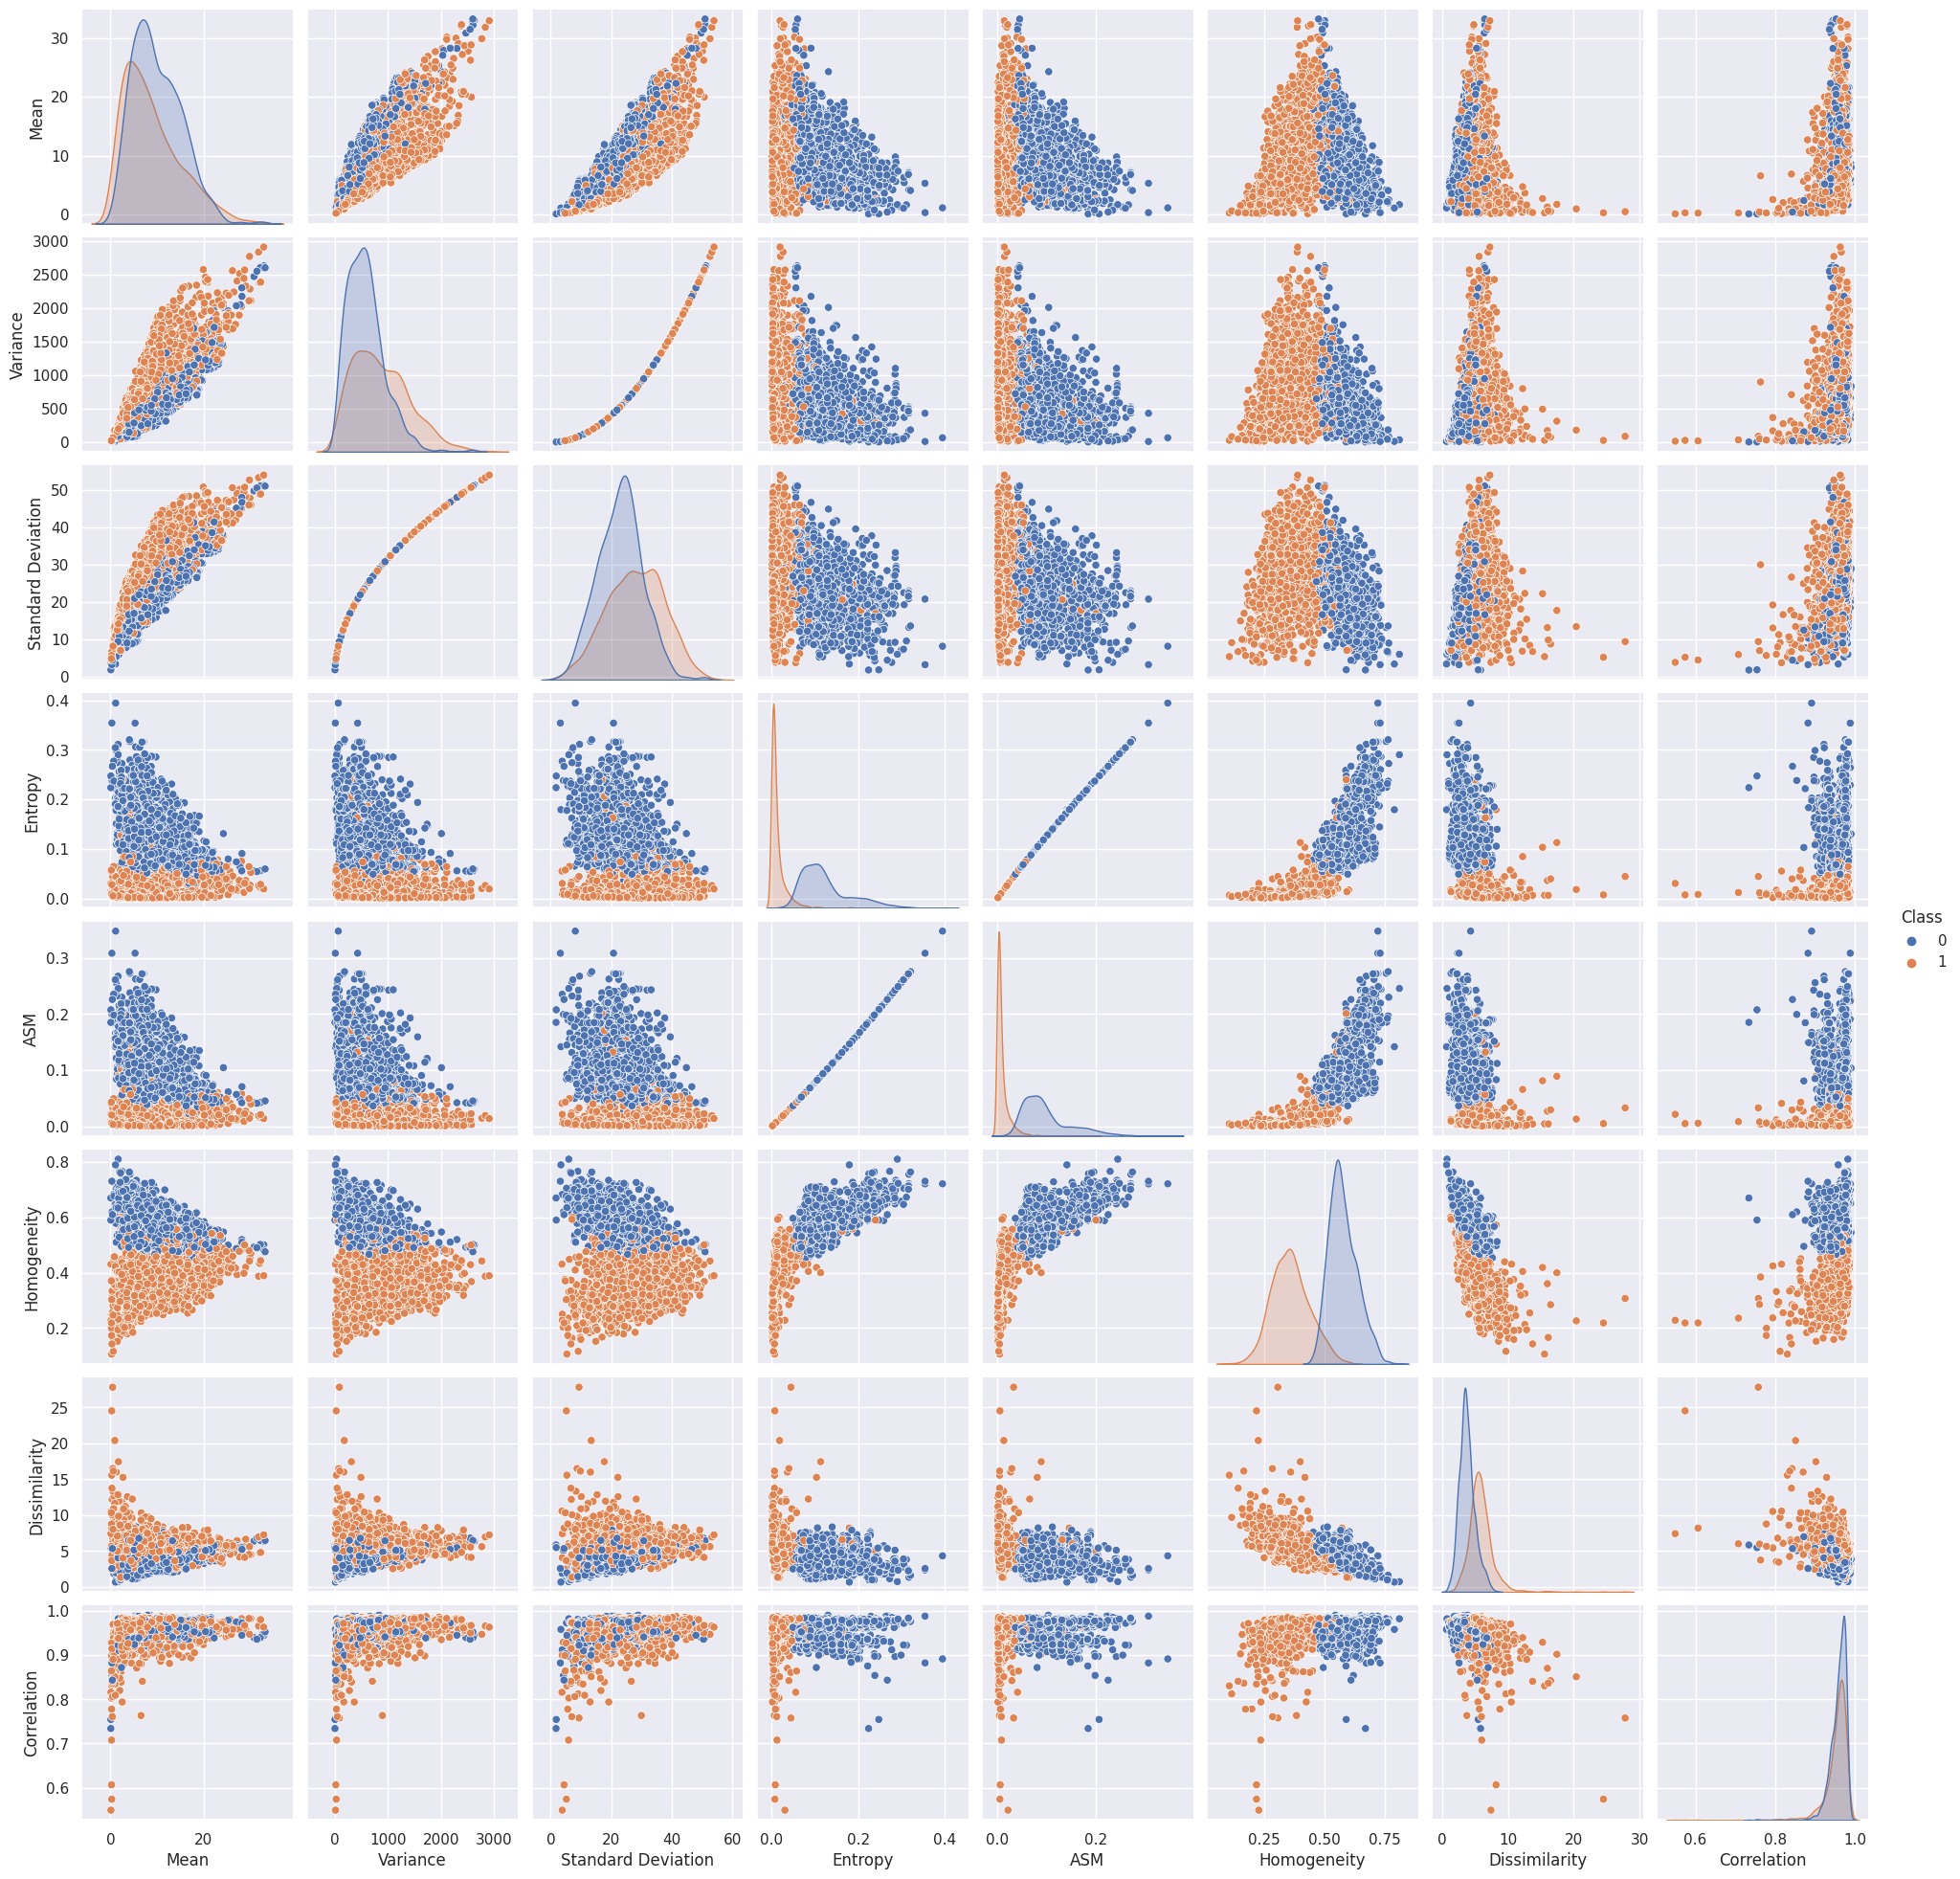

In [24]:
sns.pairplot(df, hue='Class')
plt.show()

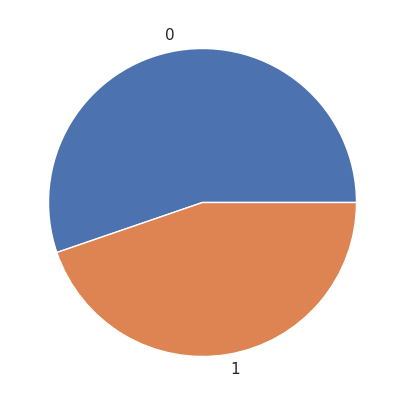

In [25]:
y =df['Class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [26]:
X = df.drop(columns=['Class'])
X.head(10)

Mean     Variance  Standard Deviation   Entropy       ASM  \
0   6.535339   619.587845           24.891522  0.109059  0.086033   
1   8.749969   805.957634           28.389393  0.266538  0.225674   
2   7.341095  1143.808219           33.820234  0.001467  0.001019   
3   5.958145   959.711985           30.979219  0.001477  0.001026   
4   7.315231   729.540579           27.010009  0.146761  0.118232   
5   7.524109   607.395258           24.645390  0.214086  0.177736   
6  12.304413   922.746138           30.376737  0.128833  0.102832   
7  15.929474  1069.950248           32.710094  0.107658  0.084868   
8  19.921616  1166.120922           34.148513  0.094975  0.074248   
9   8.476196  1095.785127           33.102645  0.003002  0.002087   

   Homogeneity  Dissimilarity  Correlation  
0     0.530941       4.473346     0.981939  
1     0.651352       3.220072     0.988834  
2     0.268275       5.981800     0.978014  
3     0.243851       7.700919     0.964189  
4     0.501140       6.834689     0.972789  
5     0.598169       4.193146     0.976485  
6     0.532292       4.880320     0.974745  
7     0.532262       4.242054     0.976774  
8     0.526644       4.027167     0.974310  
9     0.361432       4.590795     0.967830

In [27]:
X.describe().transpose()

count        mean         std       min         25%  \
Mean                3762.0    9.488890    5.728022  0.078659    4.982395   
Variance            3762.0  711.101063  467.466896  3.145628  363.225459   
Standard Deviation  3762.0   25.182271    8.773526  1.773592   19.058475   
Entropy             3762.0    0.073603    0.070269  0.000882    0.006856   
ASM                 3762.0    0.058632    0.058300  0.000612    0.004847   
Homogeneity         3762.0    0.479252    0.127929  0.105490    0.364973   
Dissimilarity       3762.0    4.698498    1.850173  0.681121    3.412363   
Correlation         3762.0    0.955767    0.026157  0.549426    0.947138   

                           50%         75%          max  
Mean                  8.477531   13.212723    33.239975  
Variance            622.580417  966.954319  2910.581879  
Standard Deviation   24.951560   31.095889    53.949809  
Entropy               0.066628    0.113284     0.394539  
ASM                   0.050849    0.089342     0.347725  
Homogeneity           0.512551    0.575557     0.810921  
Dissimilarity         4.482404    5.723821    27.827751  
Correlation           0.961610    0.971355     0.989972

**Standardize the Data**

In [28]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

Mean  Variance  Standard Deviation   Entropy       ASM  Homogeneity  \
0 -0.515700 -0.195790           -0.033144  0.504650  0.470073     0.404100   
1 -0.129018  0.202943            0.365594  2.746050  2.865580     1.345457   
2 -0.375013  0.925765            0.984680 -1.026708 -0.988340    -1.649391   
3 -0.616481  0.531896            0.660820 -1.026561 -0.988223    -1.840334   
4 -0.379529  0.039451            0.208352  1.041256  1.022442     0.171115   
5 -0.343058 -0.221876           -0.061201  1.999492  2.043216     0.929680   
6  0.491600  0.452809            0.592140  0.786094  0.758254     0.414664   
7  1.124549  0.767748            0.858130  0.484704  0.450084     0.414424   
8  1.821591  0.973503            1.022101  0.304199  0.267905     0.370503   
9 -0.176820  0.823021            0.902878 -1.004859 -0.970011    -0.921103   

   Dissimilarity  Correlation  
0      -0.121709     1.000713  
1      -0.799181     1.264377  
2       0.693704     0.850636  
3       1.622995     0.322041  
4       1.154744     0.650854  
5      -0.273174     0.792183  
6       0.098286     0.725663  
7      -0.246736     0.803243  
8      -0.362896     0.709033  
9      -0.058220     0.461240

In [ ]:
X.describe().transpose()

count          mean       std        min       25%  \
Mean                3762.0 -2.285371e-16  1.000133  -1.643060 -0.786850   
Variance            3762.0  0.000000e+00  1.000133  -1.514652 -0.744271   
Standard Deviation  3762.0  2.568682e-16  1.000133  -2.668459 -0.698079   
Entropy             3762.0 -1.510989e-17  1.000133  -1.035037 -0.949997   
ASM                 3762.0  1.359890e-16  1.000133  -0.995323 -0.922673   
Homogeneity         3762.0  3.928572e-16  1.000133  -2.922023 -0.893420   
Dissimilarity       3762.0  7.554947e-17  1.000133  -2.171641 -0.695235   
Correlation         3762.0  1.684753e-15  1.000133 -15.536855 -0.329931   
Coarseness          3762.0  0.000000e+00  0.000000   0.000000  0.000000   

                         50%       75%        max  
Mean               -0.176587  0.650194   4.147024  
Variance           -0.189388  0.547391   4.705730  
Standard Deviation -0.026300  0.674119   3.279339  
Entropy            -0.099269  0.564790   4.567876  
ASM                -0.133515  0.526833   4.959343  
Homogeneity         0.260329  0.752898   2.592945  
Dissimilarity      -0.116812  0.554251  12.502795  
Correlation         0.223417  0.596023   1.307888  
Coarseness          0.000000  0.000000   0.000000

**Observations and variables**

In [29]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

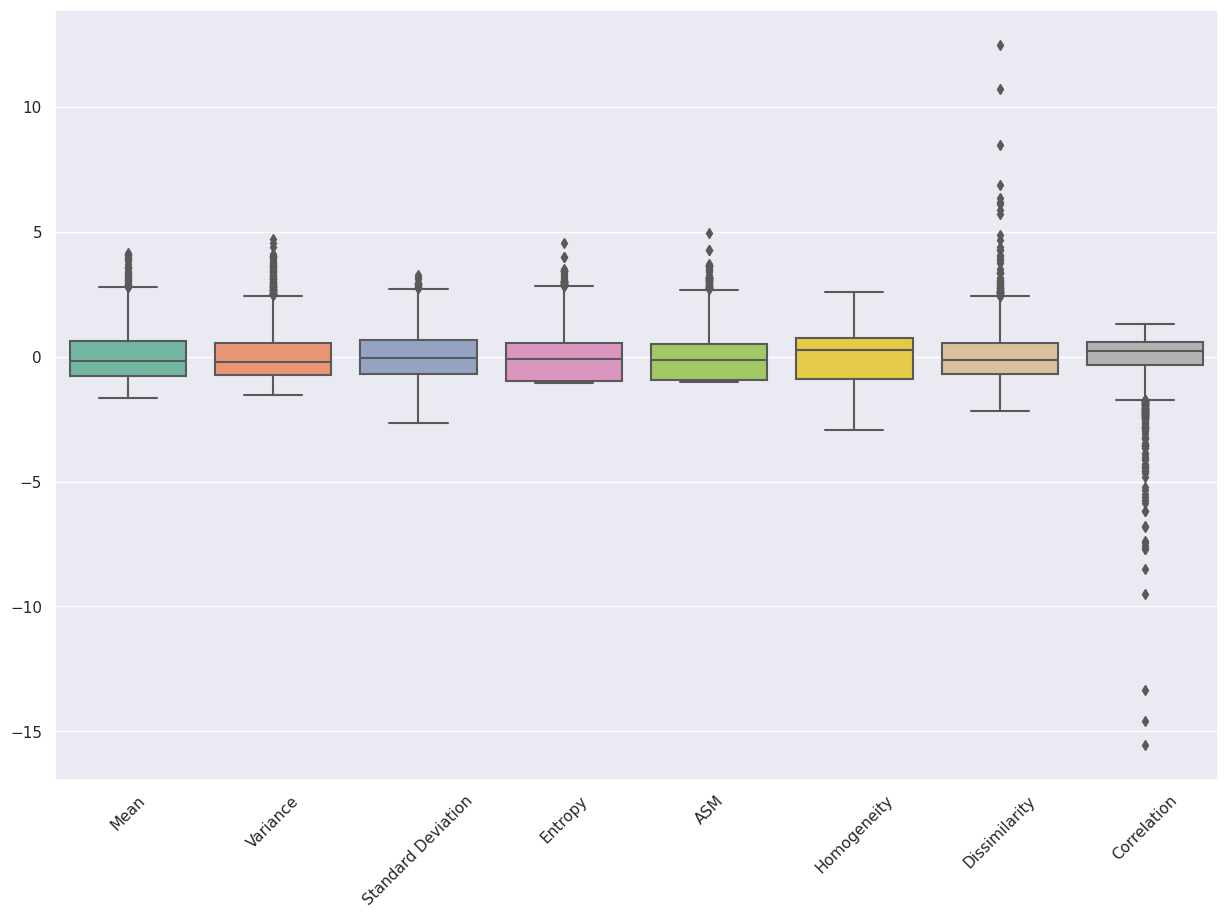

In [30]:
ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

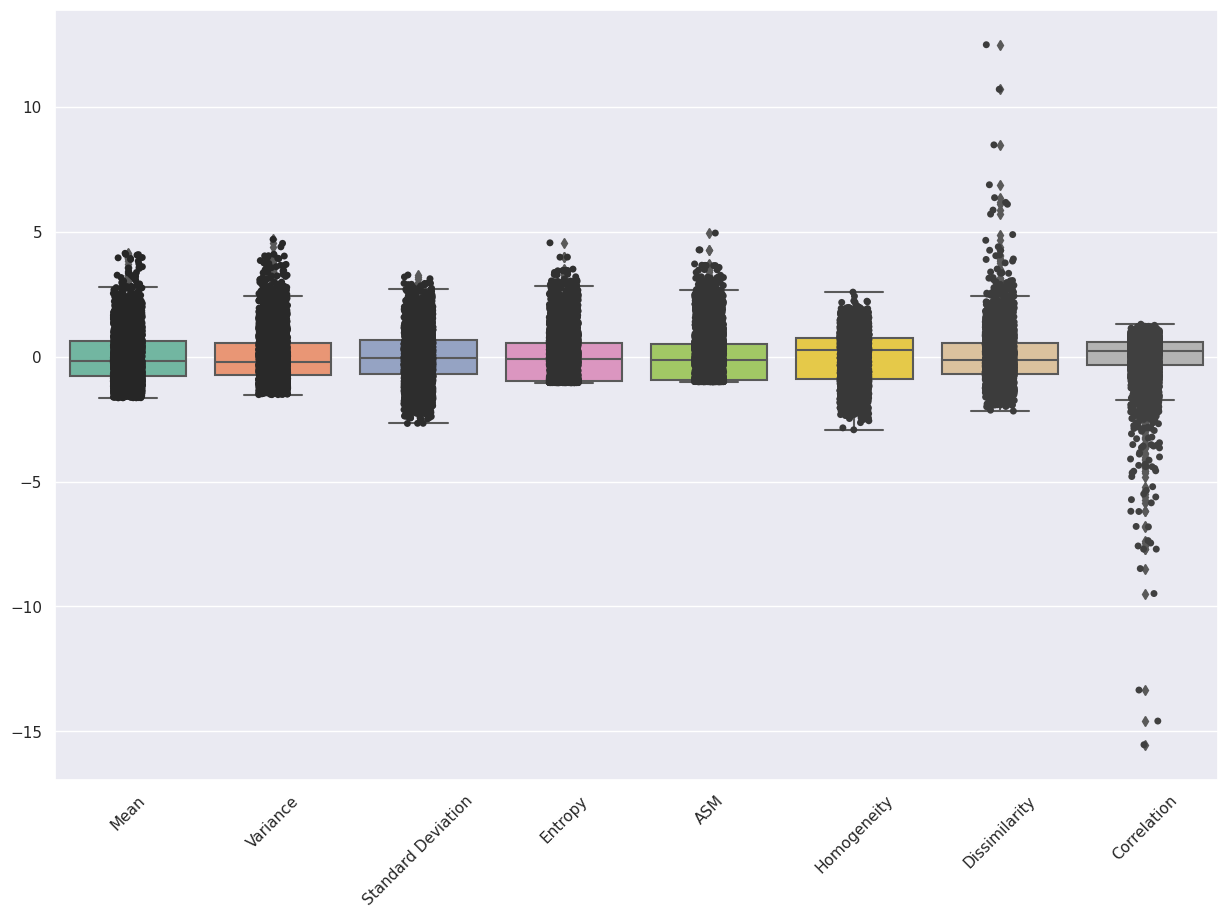

In [31]:
ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

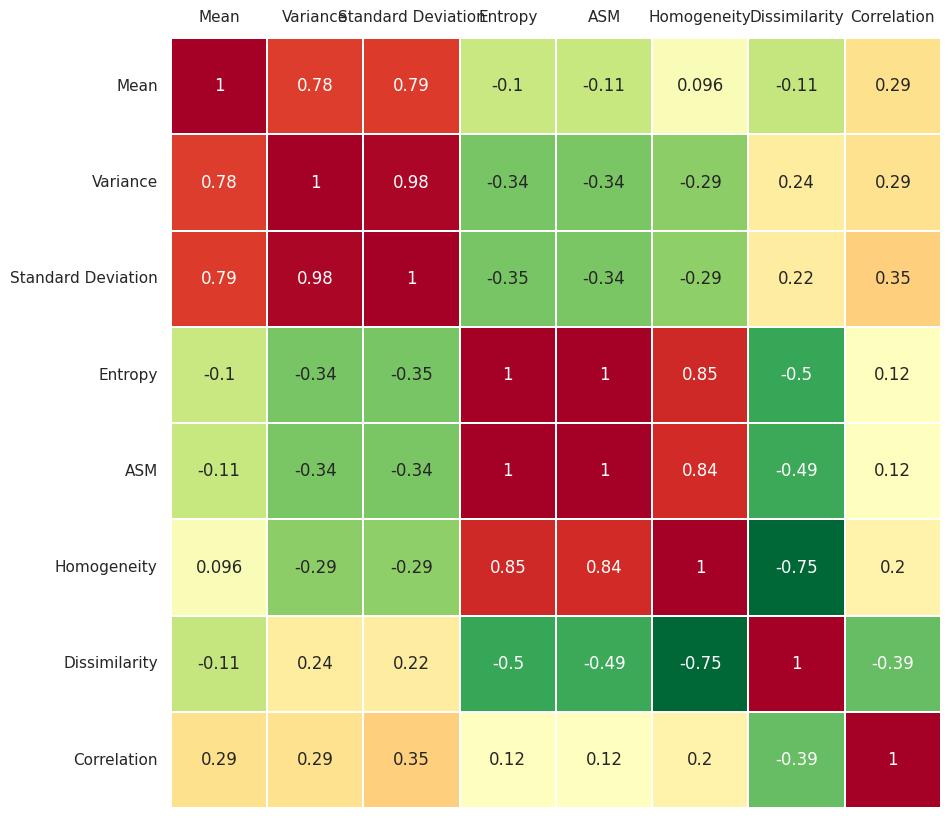

In [32]:
fig1,ax1 = plt.subplots(figsize=(15,10))
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.3, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

# Principal Component Analysis (PCA)

Text(0, 0.5, 'Z2')

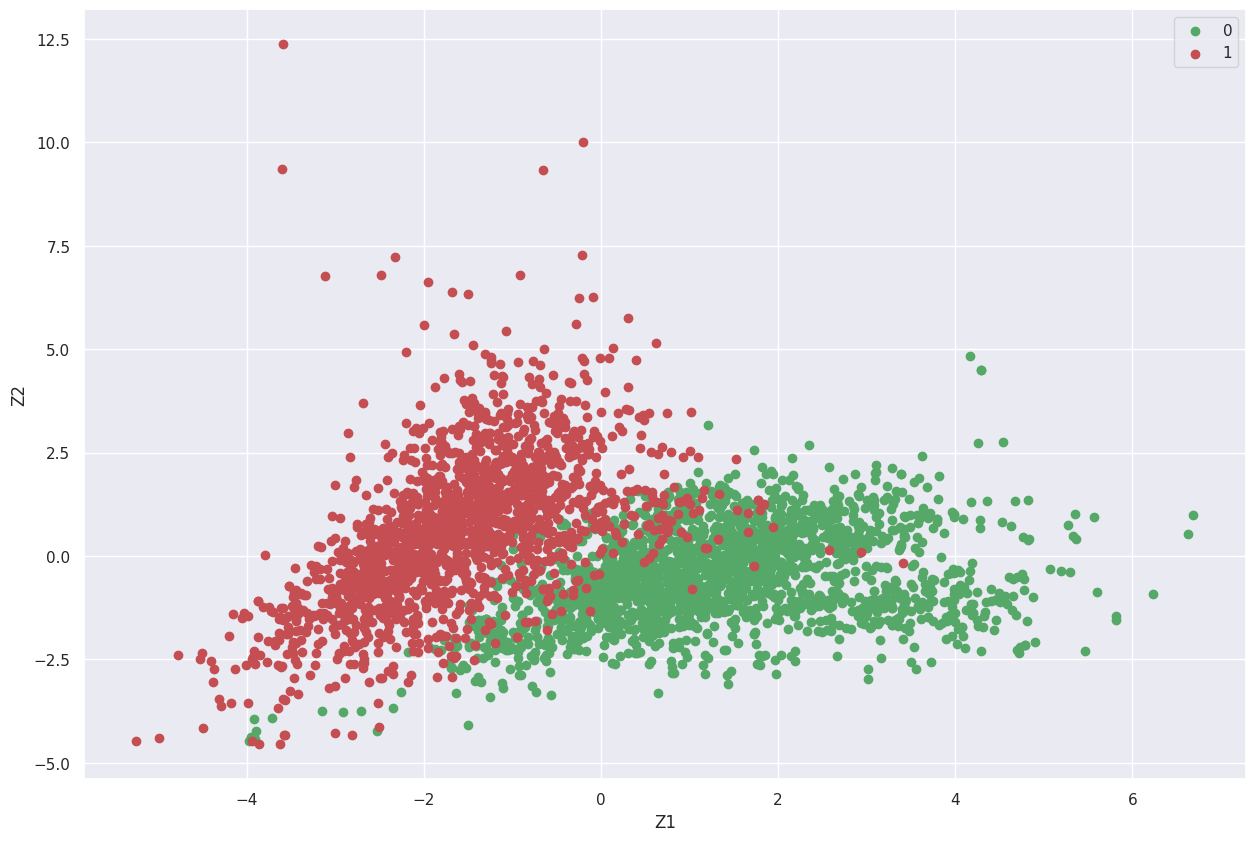

In [33]:
pca = PCA()
Z = pca.fit_transform(X)


idx_0= np.where(y == 0)
idx_1 = np.where(y == 1)


plt. figure(figsize=(15,10))
plt.scatter(Z[idx_0,0], Z[idx_0,1], c='g', label='0')
plt.scatter(Z[idx_1,0], Z[idx_1,1], c='r', label='1')


plt.legend()
plt.xlabel('Z1')
plt.ylabel('Z2')

**Eigenvectors**

array([[-0.21220778, -0.50101134,  0.21451603,  0.38907625,  0.61823062,
        -0.34834755,  0.0539691 ,  0.00950058],
       [-0.36840798, -0.39870558,  0.20759373, -0.08073208, -0.44086066,
         0.15516716,  0.66111509, -0.01372805],
       [-0.36785106, -0.41220175,  0.14845409, -0.12791386, -0.29935623,
         0.1190696 , -0.74335837,  0.00116113],
       [ 0.44639473, -0.20562459,  0.31652531, -0.28904932, -0.05298823,
        -0.2192704 , -0.00884024, -0.72370372],
       [ 0.44377467, -0.20158413,  0.31989678, -0.31256502, -0.09530256,
        -0.28226101,  0.00409162,  0.68820523],
       [ 0.42614723, -0.29402916,  0.10242088,  0.22631425,  0.17953316,
         0.79734081, -0.01083591,  0.04620915],
       [-0.32566921,  0.29188877,  0.44465097, -0.55666054,  0.47270139,
         0.27582373,  0.03773192,  0.01435388],
       [ 0.00793159, -0.40686776, -0.69146392, -0.53235754,  0.25738984,
         0.02859525,  0.07613476,  0.00225591]])

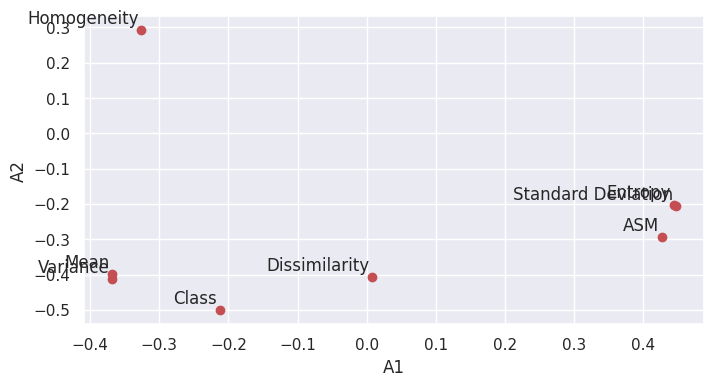

In [34]:
A = pca.components_.T
plt. figure(figsize=(8,4))

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')
A


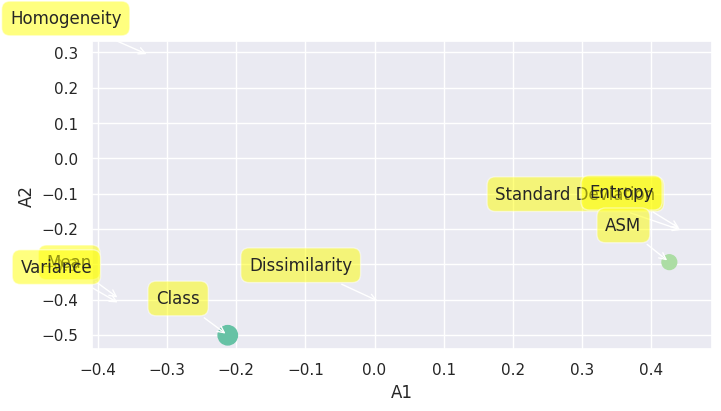

In [35]:
plt. figure(figsize=(8,4))
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree Plot and Eigenvalues**

array([3.79246881e+00, 2.55056247e+00, 8.58022304e-01, 5.56238597e-01,
       1.47029120e-01, 7.67775544e-02, 2.07177823e-02, 3.10454630e-04])

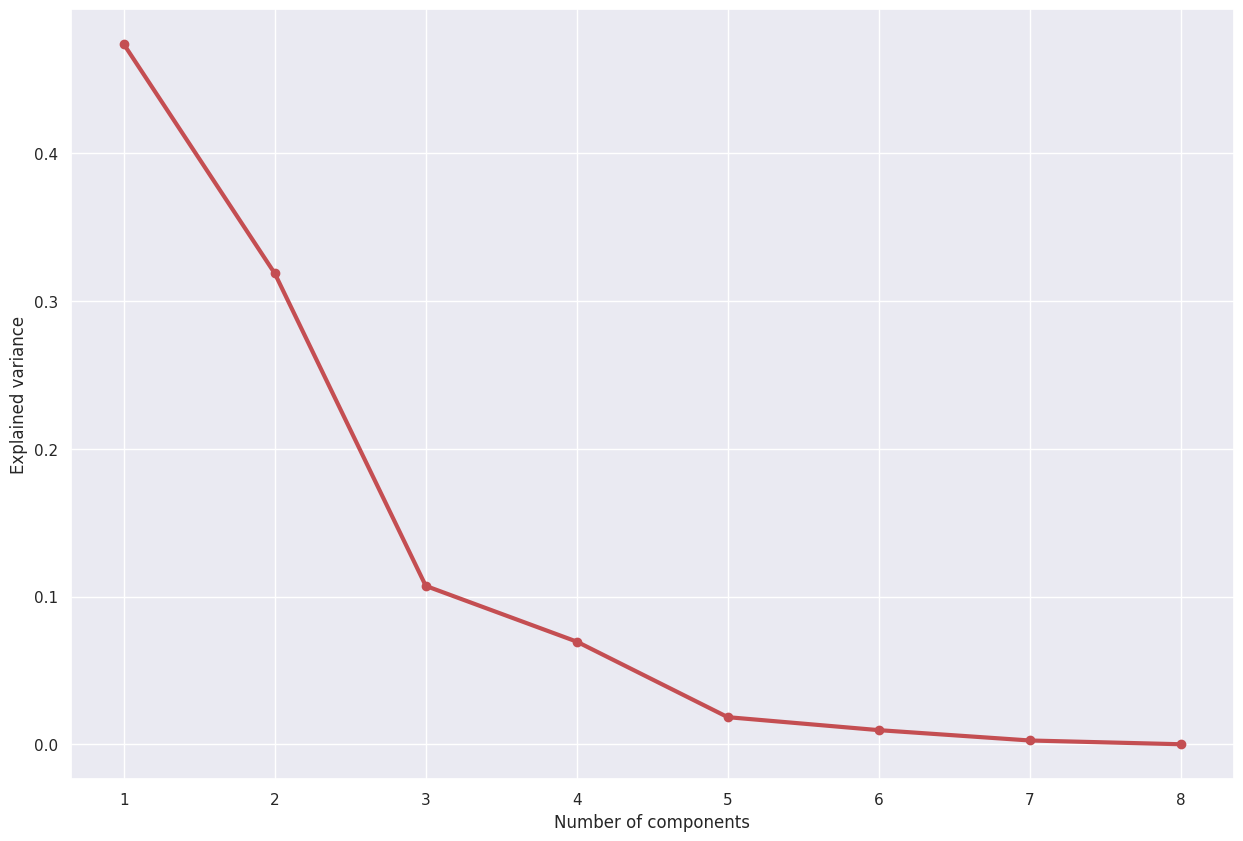

In [36]:
#Eigenvalues
Lambda = pca.explained_variance_

#Scree plot
x = np.arange(len(Lambda)) + 1
plt. figure(figsize=(15,10))
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
Lambda

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

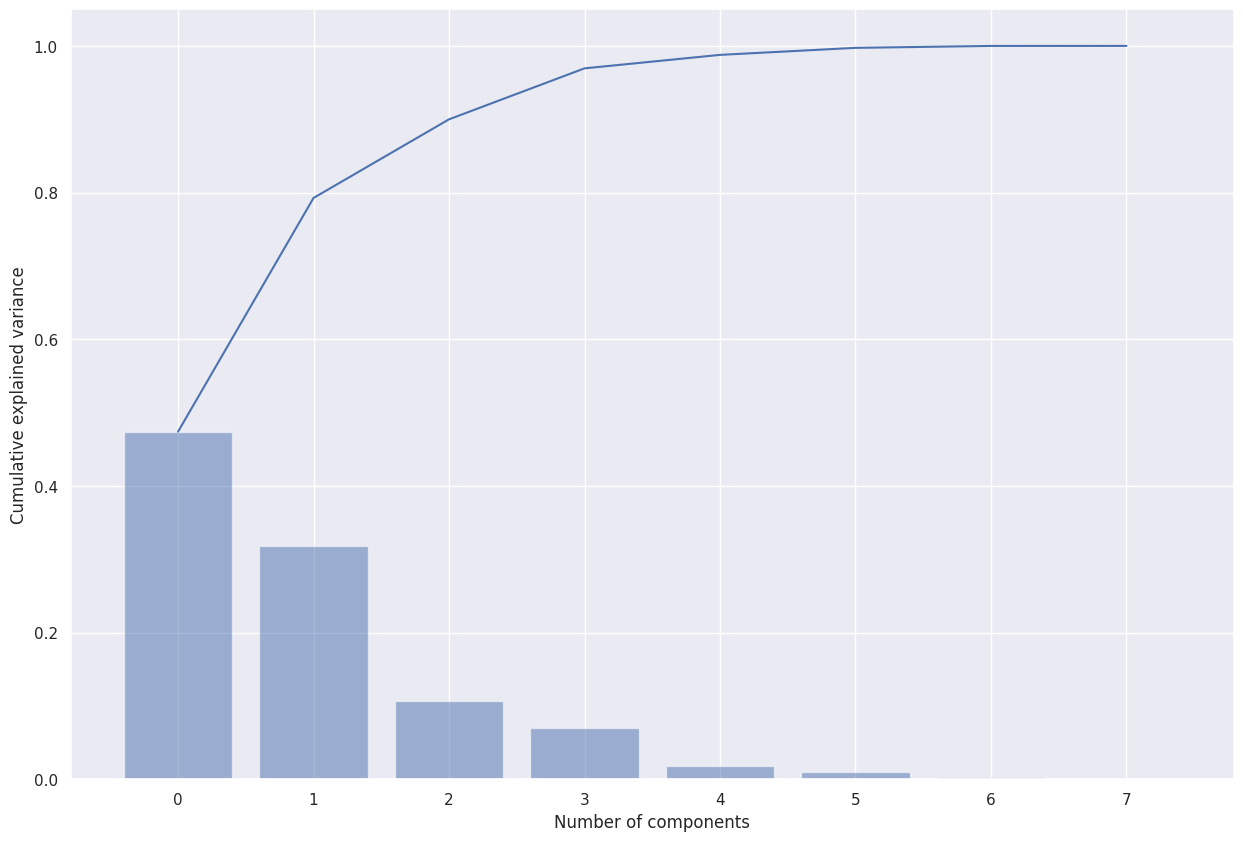

In [37]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt. figure(figsize=(15,10))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

array([-0.40993172, -2.45259396,  0.16459826, ..., -1.40601569,
       -0.36928406,  0.95279704])

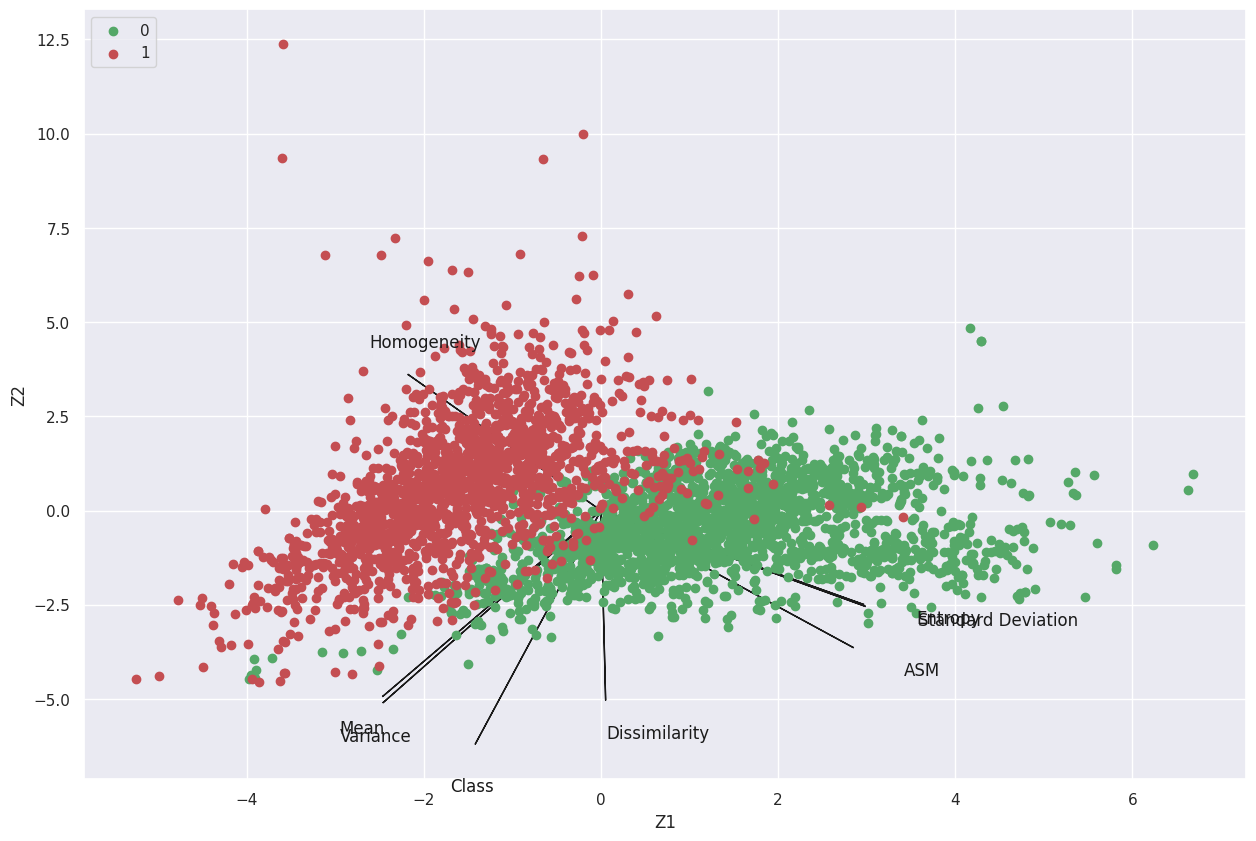

In [38]:
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt. figure(figsize=(15,10))
plt.xlabel('Z1')
plt.ylabel('Z2')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_0,0], Z[idx_0,1], c='g', label='0')
plt.scatter(Z[idx_1,0], Z[idx_1,1], c='r', label='1')

plt.legend(loc='upper left')
Z1
Z2

# Using PCA Library

> Indented block



In [39]:
!pip install pca

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 2.8 MB/s eta 0:00:00


In [40]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [8] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [4] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [8] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


**Principal Components**

In [41]:
out['PC']

PC1       PC2       PC3       PC4
0     0.847418 -0.409932 -0.550768 -0.846931
1     3.159282 -2.452594  0.762787 -1.726503
2    -2.442666  0.164598 -0.831889 -0.953193
3    -2.515274  1.118516 -0.254289 -1.253109
4     0.609926 -0.309748  0.695307 -1.748617
...        ...       ...       ...       ...
3757 -1.433170 -1.701927  0.980858  0.622998
3758 -1.316995 -1.760589  0.924433  0.566908
3759 -1.139502 -1.406016  0.807985  0.404139
3760 -0.704212 -0.369284  1.272533 -0.191723
3761  0.671108  0.952797  1.074340 -0.769213

[3762 rows x 4 columns]

**Scatter plot**

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '4 Principal Components explain [98.77%] of the variance'}, xlabel='PC1 (47.3% expl.var)', ylabel='PC2 (31.8% expl.var)'>)

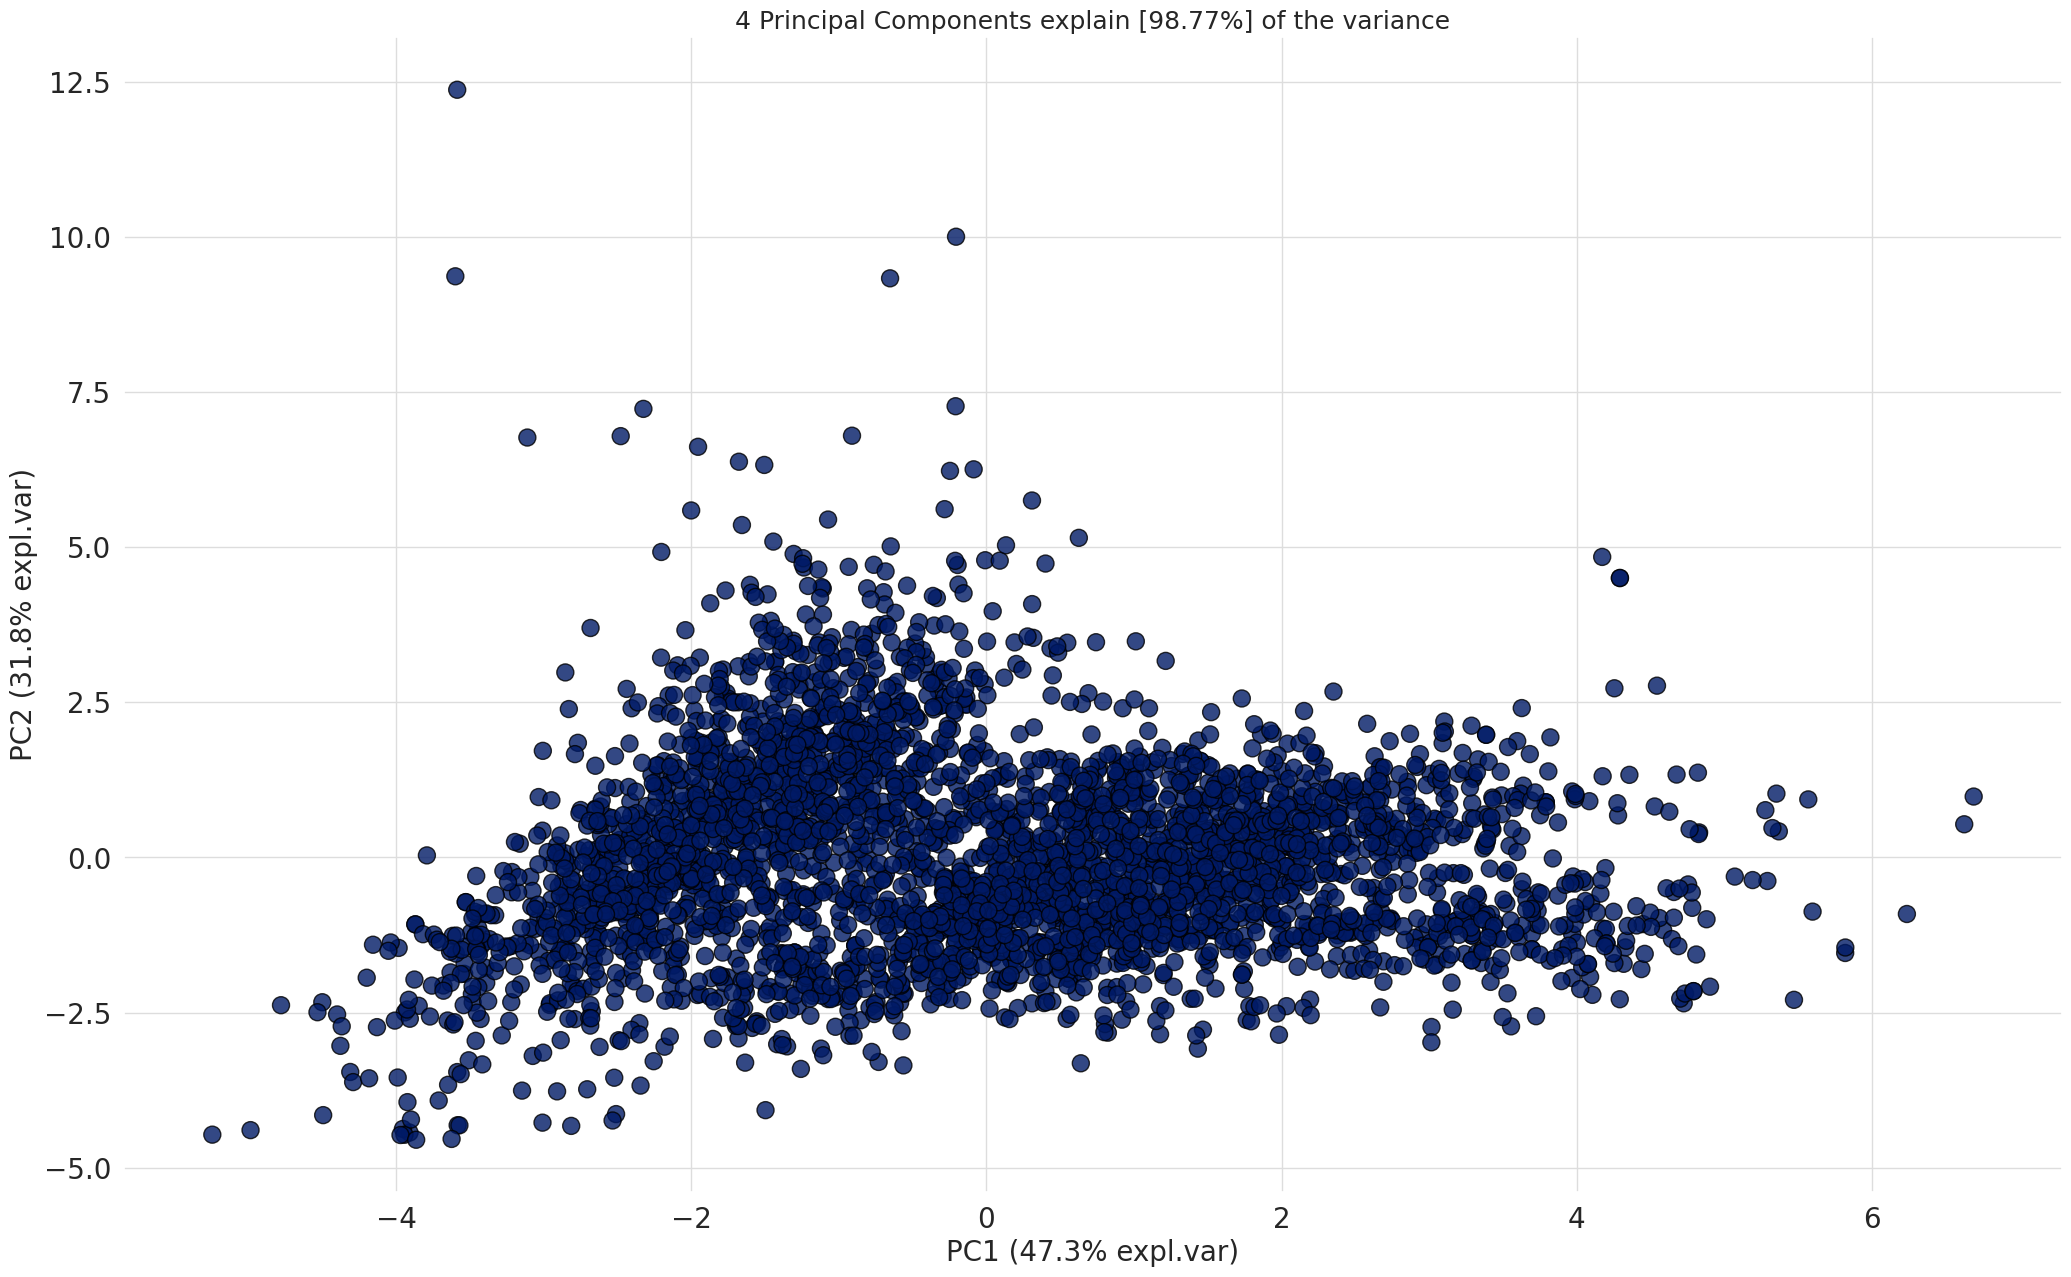

In [42]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [43]:
A = out['loadings'].T
A

PC1       PC2       PC3       PC4
Mean               -0.212208 -0.501011  0.214516  0.389076
Variance           -0.368408 -0.398706  0.207594 -0.080732
Standard Deviation -0.367851 -0.412202  0.148454 -0.127914
Entropy             0.446395 -0.205625  0.316525 -0.289049
ASM                 0.443775 -0.201584  0.319897 -0.312565
Homogeneity         0.426147 -0.294029  0.102421  0.226314
Dissimilarity      -0.325669  0.291889  0.444651 -0.556661
Correlation         0.007932 -0.406868 -0.691464 -0.532358

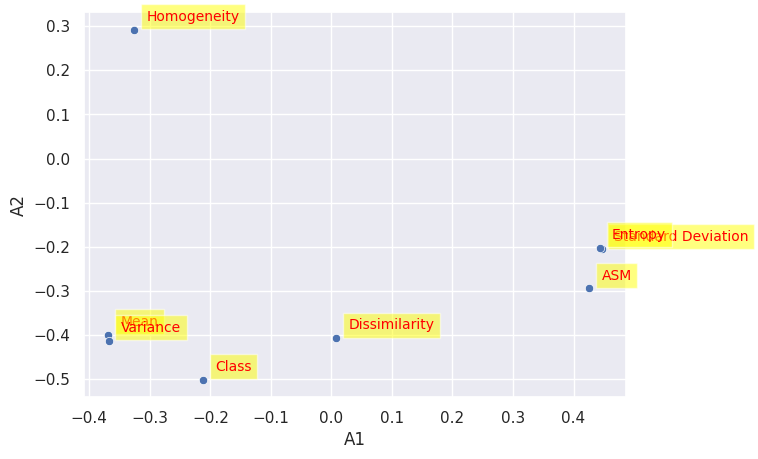

In [44]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('A1')
plt.ylabel('A2')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

**Scree Plot**

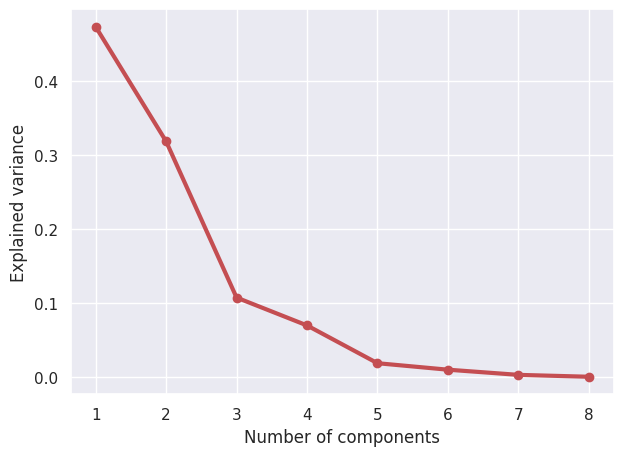

In [45]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

**Explained Variance Plot**

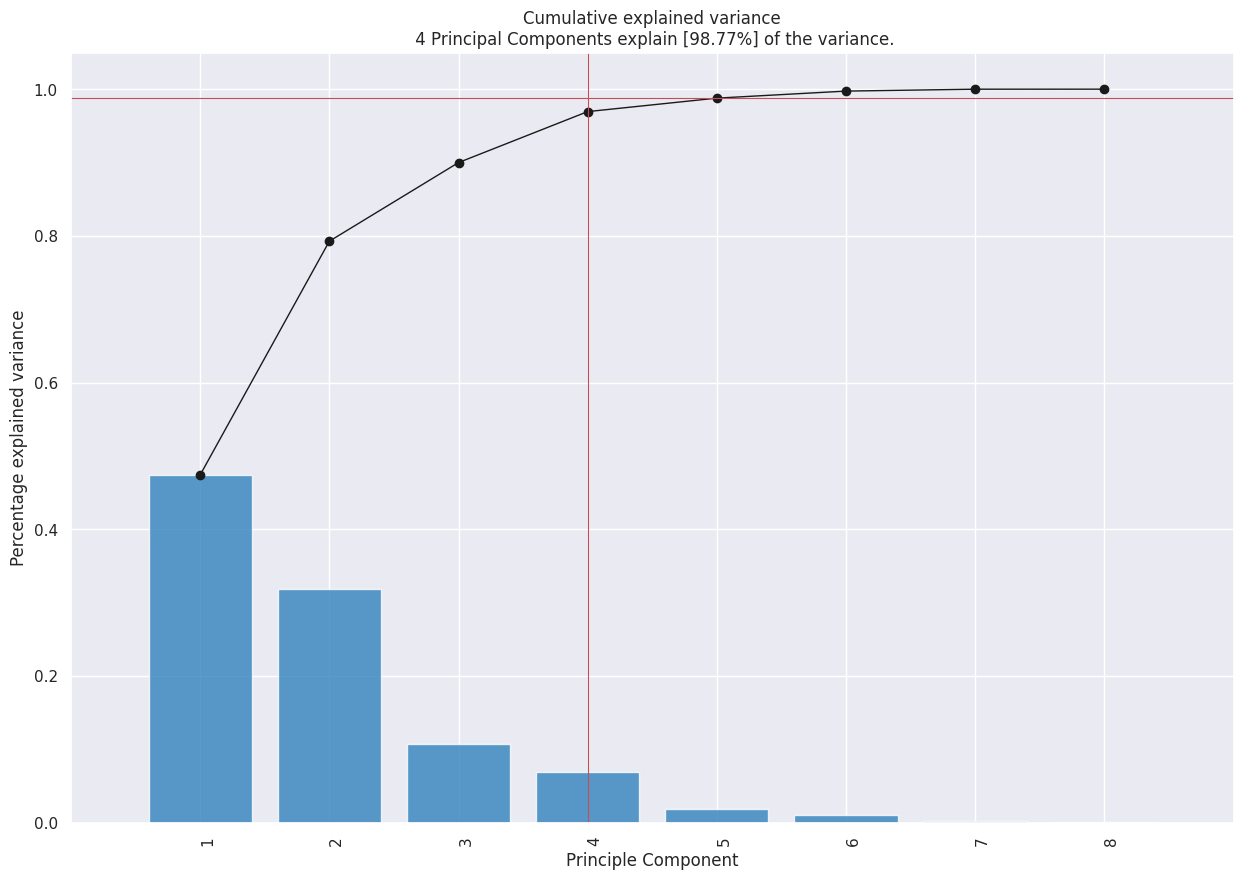

In [46]:
model.plot();

**Biplot**

[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


[scatterd] >INFO> Create scatterplot


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '4 Principal Components explain [98.77%] of the variance'}, xlabel='PC1 (47.3% expl.var)', ylabel='PC2 (31.8% expl.var)'>)

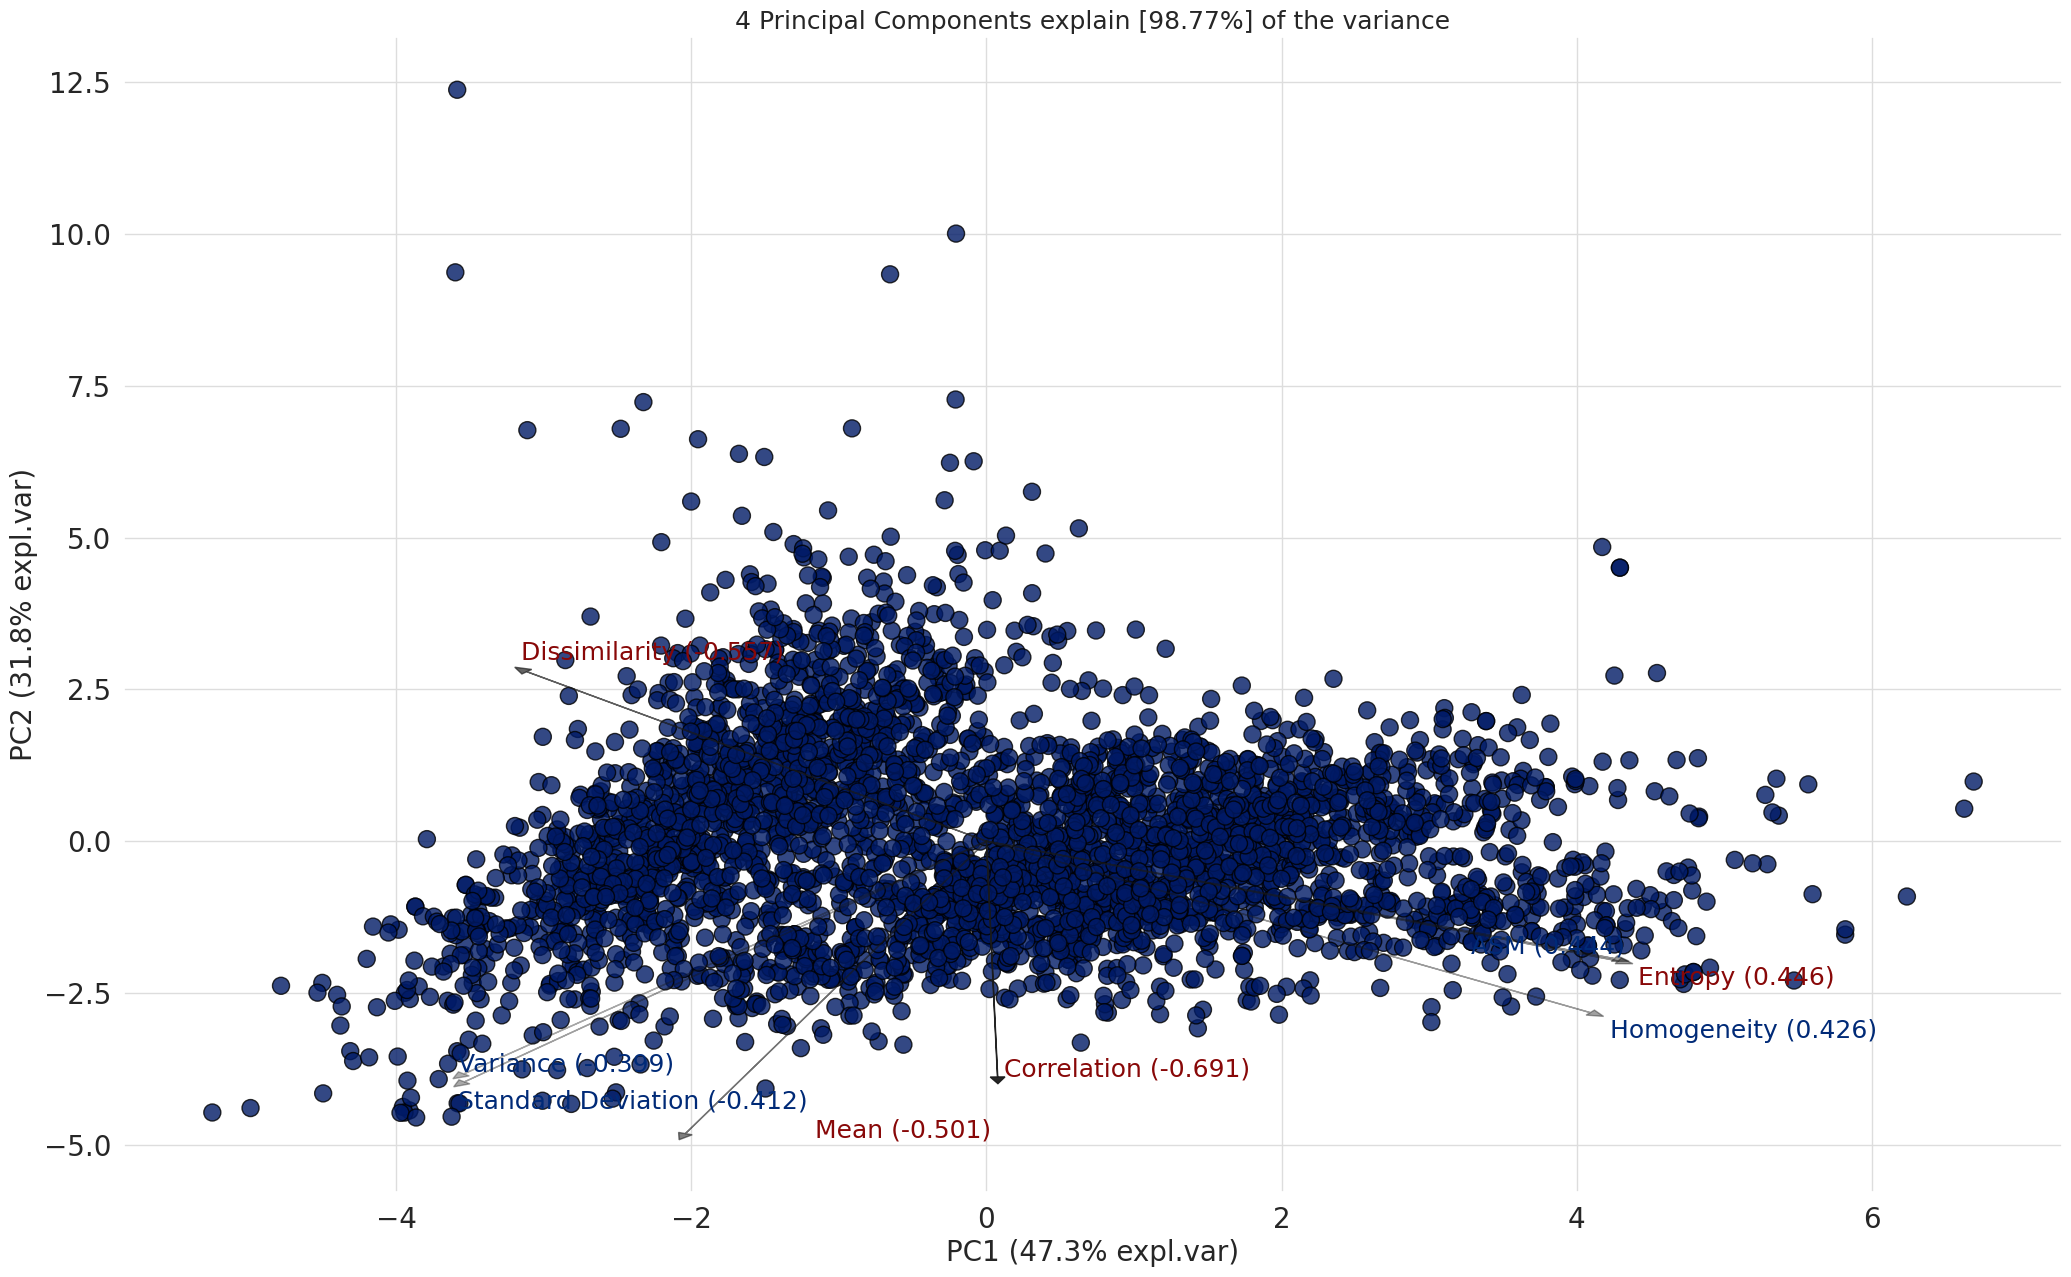

In [47]:
model.biplot(label=False, legend=False, color_arrow='k')

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


[scatterd] >INFO> Create scatterplot


(<Figure size 3000x2500 with 1 Axes>,
 <Axes3D: title={'center': '4 Principal Components explain [98.77%] of the variance'}, xlabel='PC1 (47.3% expl.var)', ylabel='PC2 (31.8% expl.var)', zlabel='PC3 (10.7% expl.var)'>)

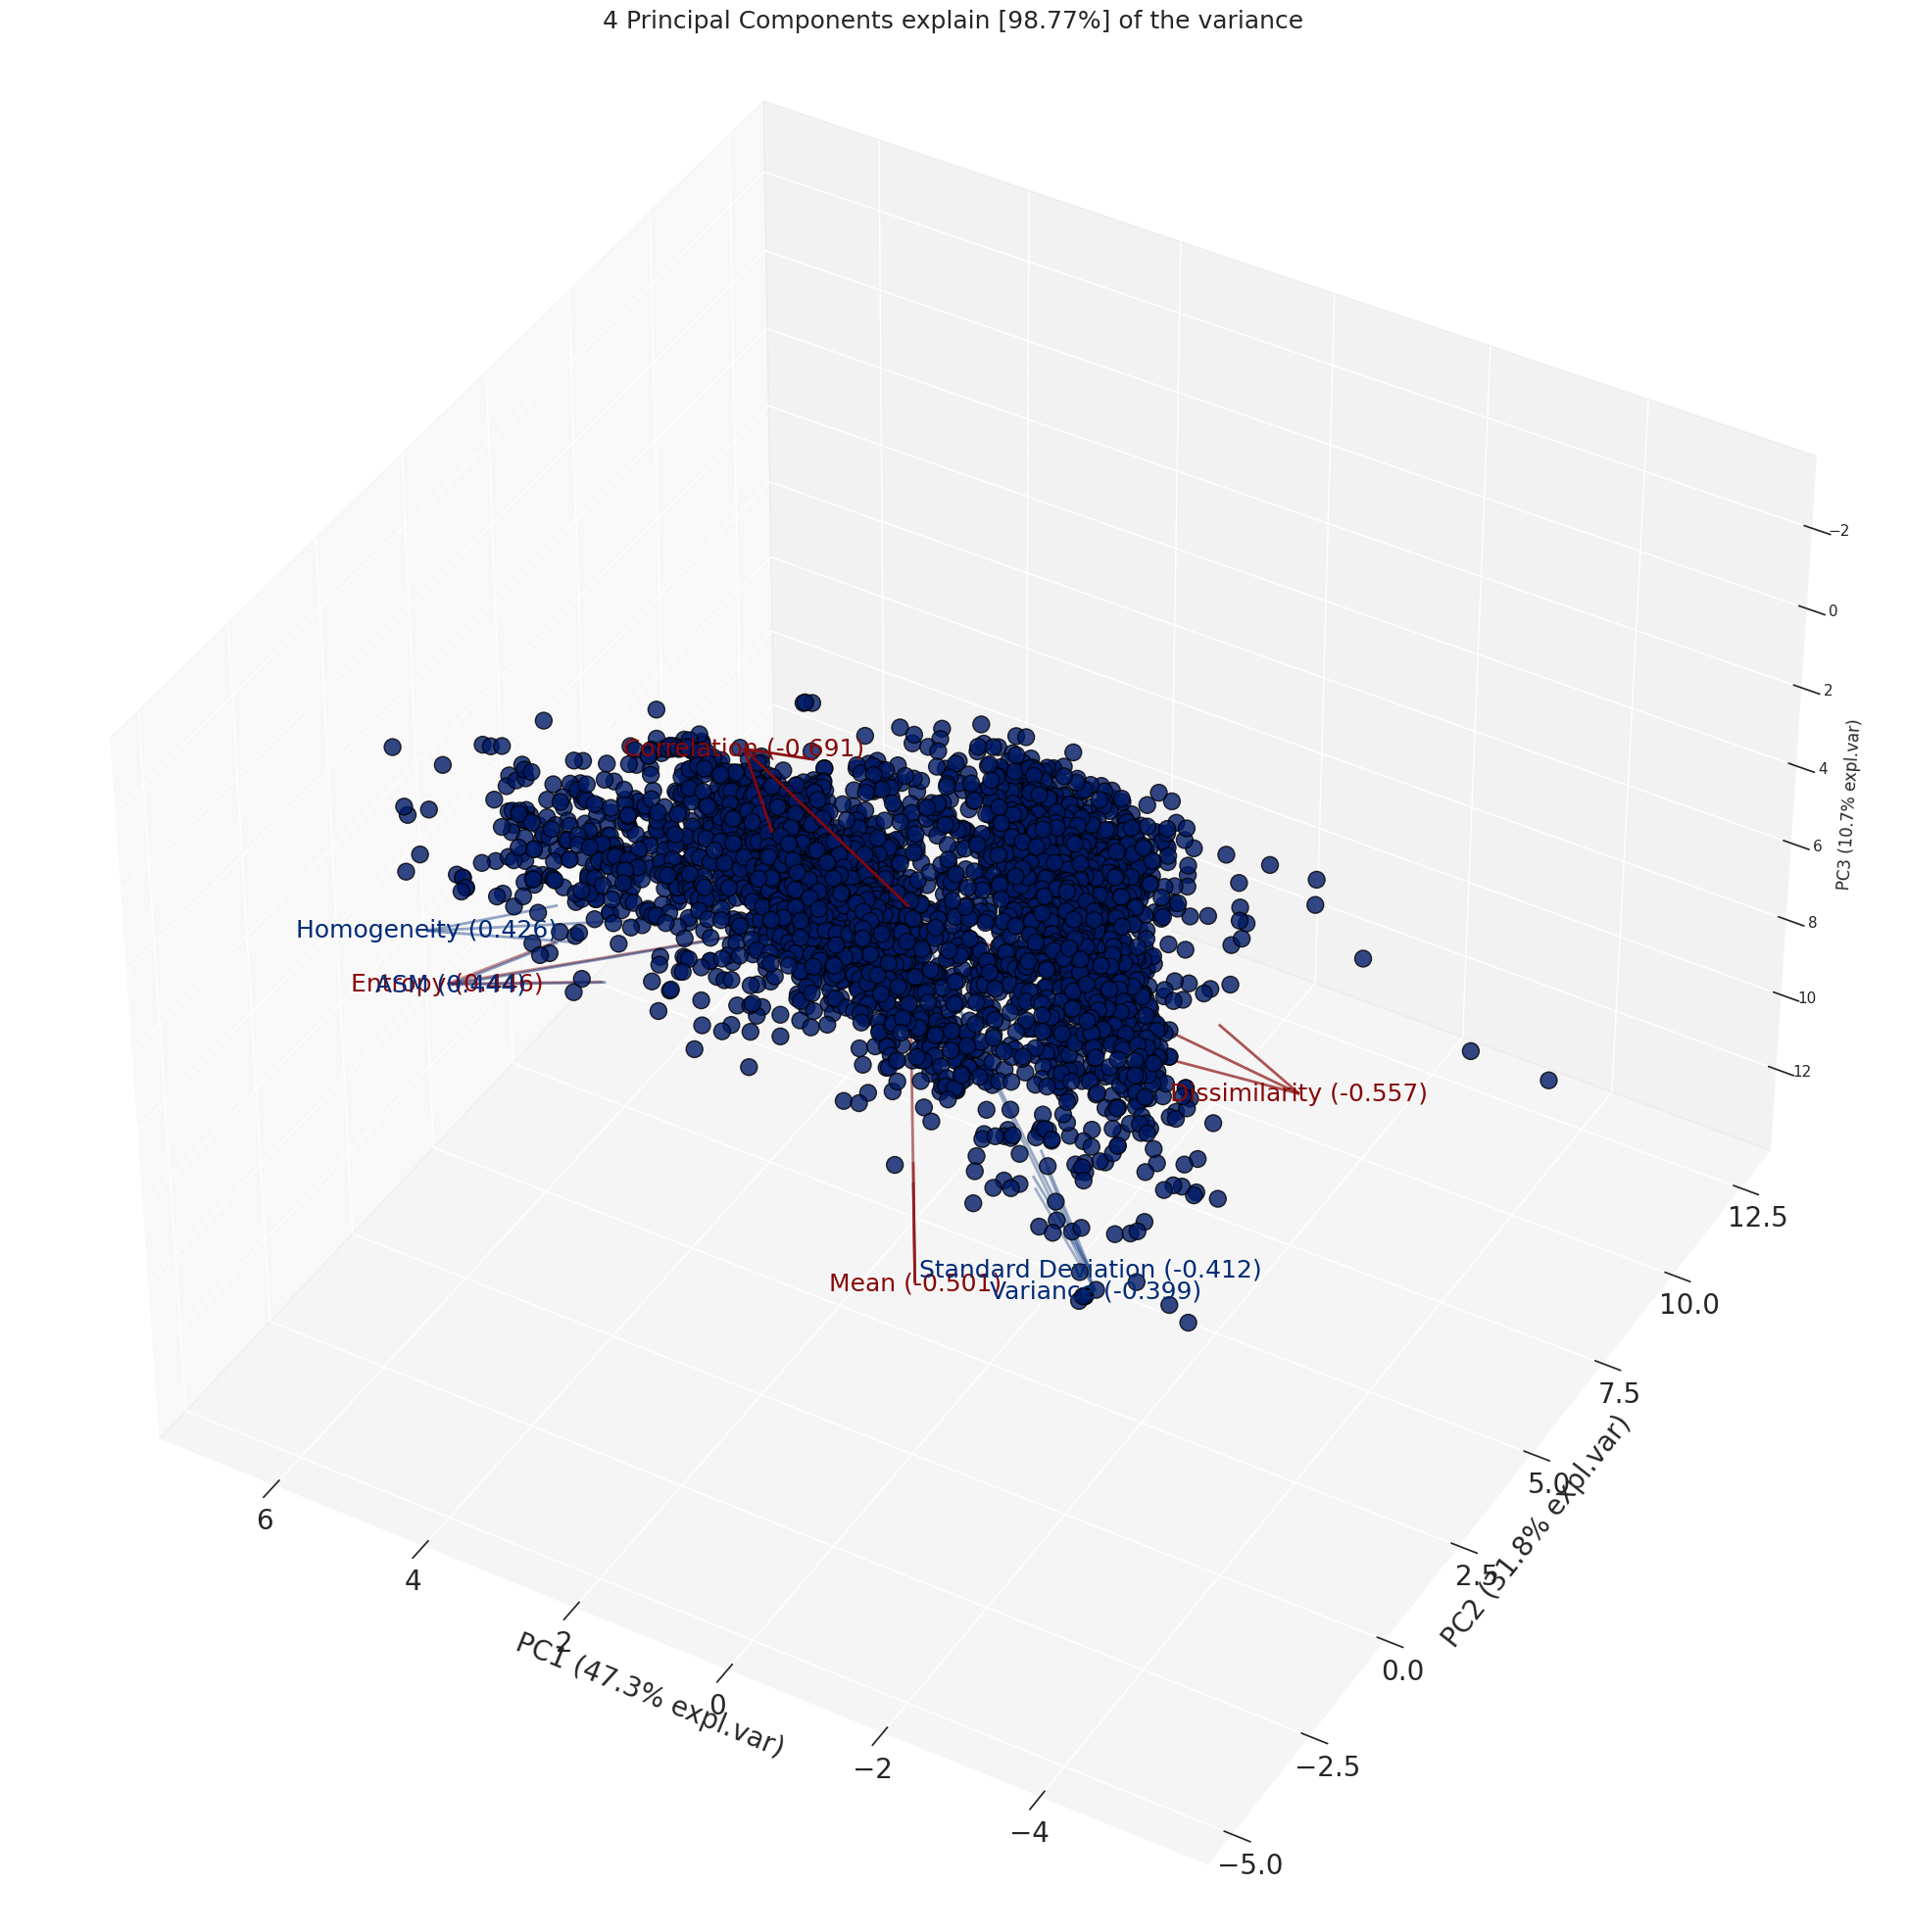

In [48]:
model.biplot3d(legend=False)

# Classification using Pycaret

At first dataset is split into train and test set with 70% and 30% ratio respectively. Then using the PyCaret compare_models() function, the models which shows the highest accuracy on the original dataset can be found. Before applying PCA, the output from compare_models() function shows that Linear Discriminant Analayis, Extra Trees Classifier, and Gradient Boosting Classifier shows the best performance.

However, after applying PCA, the these models performance decreases and Logistic Regression, K-nearest neighbour, and Quadratic Discriminant Analysis shows the highest performance. Therefore, I have taken Logistic Regression, K-nearest Neighbour and Quadratic discriminant Analysis as my classification algorithms and applied these three models on the original dataset before applying PCA and after applying PCA

In [49]:
from pycaret.utils import version
version()

'3.0.0'

In [50]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)
#dr = df.drop(columns=['id'])

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (3386, 9)
Unseen Data For Predictions: (376, 9)


In [51]:
from pycaret.classification import *
clf = setup(data=data, target='Class', train_size=0.7, session_id=123)

**Comparing All Models**

In [52]:
best_model = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [53]:
best_model

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

**Logistic Regresssion**

In [54]:
lr = create_model('lr')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Tune the model

In [55]:
tuned_lr=tune_model(lr)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [56]:
tuned_lr

LogisticRegression(C=8.866, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
!pip install pycaret --upgrade


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 47.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.0/119.0 kB 13.8 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4
  Attempting uninstall: scikit-base
    Found existing installation: scikit-base 0.6.1
    Uninstalling scikit-base-0.6.1:
      Successfully uninstalled scikit-base-0.6.1
  Attempting uninstall: schemdraw
    Found existing installation: schemdraw 0.17
    Uninstalling schemdraw-0.17:
      Successfully uninstalled schemdraw-0.17
  Attempting uninstall: m

Evaluate Logistic Regression

In [58]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create model with K-nearest neighbour**

In [59]:
knn = create_model('knn')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Tune model with K-nearest neighbour

In [60]:
tuned_knn = tune_model(knn)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [61]:
tuned_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=13, p=2,
                     weights='distance')

Evaluate model with K-nearest neighbour

In [62]:
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create model with Quadratic Discriminant Analysis**

In [63]:
qda=create_model('qda')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Tune QDA Model

In [64]:
tuned_qda=tune_model(qda)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [65]:
tuned_qda

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

Evaluate QDA Model

In [66]:
evaluate_model(tuned_qda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# Classification + PCA

In [67]:
!pip install statsmodels --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 18.0 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.14.0
    Uninstalling statsmodels-0.14.0:
      Successfully uninstalled statsmodels-0.14.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [68]:
clf_pca = setup(data=data, target='Class', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

Comparing Models

In [69]:
best_model_pca = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

Best model with PCA

In [70]:
best_model_pca

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

Tune Best Model

In [71]:
tuned_best_model_pca = tune_model(best_model_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Evaluate Best Model

In [72]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [73]:
lr_pca = create_model('lr')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [74]:
tuned_lr_pca = tune_model(lr_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [75]:
tuned_lr_pca

LogisticRegression(C=2.833, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [76]:
evaluate_model(tuned_lr_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [77]:
knn_pca = create_model('knn')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [78]:
tuned_knn_pca = tune_model(knn_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [79]:
tuned_knn_pca

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=9, p=2,
                     weights='distance')

In [80]:
evaluate_model(tuned_knn_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [81]:
qda_pca = create_model('qda')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [82]:
tuned_qda_pca = tune_model(qda_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [83]:
tuned_qda_pca

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [84]:
evaluate_model(tuned_qda_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [85]:
et_pca = create_model('et')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [86]:
tuned_et_pca = tune_model(et_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [87]:
tuned_et_pca

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

In [88]:
evaluate_model(tuned_et_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [89]:
 !pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 5.8 MB/s eta 0:00:00


In [90]:
import shap